In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve

%matplotlib inline

In [2]:
# pip install matplotlib

## Problem 1: Clustering

### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.


In [3]:
bank = pd.read_csv('bank_marketing_part1_Data-1.csv')

In [4]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
bank.shape

(210, 7)

In [7]:
 bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [8]:
bank.duplicated().sum()

0

In [9]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [10]:
stats.shapiro(bank.spending)

ShapiroResult(statistic=0.9325932264328003, pvalue=2.9475659246713803e-08)

In [11]:
stats.shapiro(bank.advance_payments)

ShapiroResult(statistic=0.9361613392829895, pvalue=5.901836885868761e-08)

In [12]:
stats.shapiro(bank.probability_of_full_payment)

ShapiroResult(statistic=0.9730417132377625, pvalue=0.00046959755127318203)

In [13]:
stats.shapiro(bank.current_balance)

ShapiroResult(statistic=0.943798840045929, pvalue=2.8279683306209336e-07)

In [14]:
stats.shapiro(bank.credit_limit)

ShapiroResult(statistic=0.960623025894165, pvalue=1.4444454791373573e-05)

In [15]:
stats.shapiro(bank.min_payment_amt)

ShapiroResult(statistic=0.9836222529411316, pvalue=0.01543912198394537)

In [16]:
stats.shapiro(bank.max_spent_in_single_shopping)

ShapiroResult(statistic=0.9249410033226013, pvalue=7.141085056616703e-09)

### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

## Univariate Analysis

In [17]:
bank.spending = 1000*bank.spending

In [18]:
bank.advance_payments = 100*bank.advance_payments

In [19]:
bank.current_balance = 1000*bank.current_balance

In [20]:
bank.credit_limit = 10000*bank.credit_limit

In [21]:
bank.min_payment_amt = 100*bank.min_payment_amt

In [22]:
bank.max_spent_in_single_shopping = 1000*bank.max_spent_in_single_shopping

In [23]:
bank.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14847.523810,1455.928571,0.870999,5628.533333,32586.047619,370.020095,5408.071429
std,2909.699431,130.595873,0.023629,443.063478,3777.144449,150.355713,491.480499
min,10590.000000,1241.000000,0.808100,4899.000000,26300.000000,76.510000,4519.000000
25%,12270.000000,1345.000000,0.856900,5262.250000,29440.000000,256.150000,5045.000000
50%,14355.000000,1432.000000,0.873450,5523.500000,32370.000000,359.900000,5223.000000
75%,17305.000000,1571.500000,0.887775,5979.750000,35617.500000,476.875000,5877.000000
max,21180.000000,1725.000000,0.918300,6675.000000,40330.000000,845.600000,6550.000000


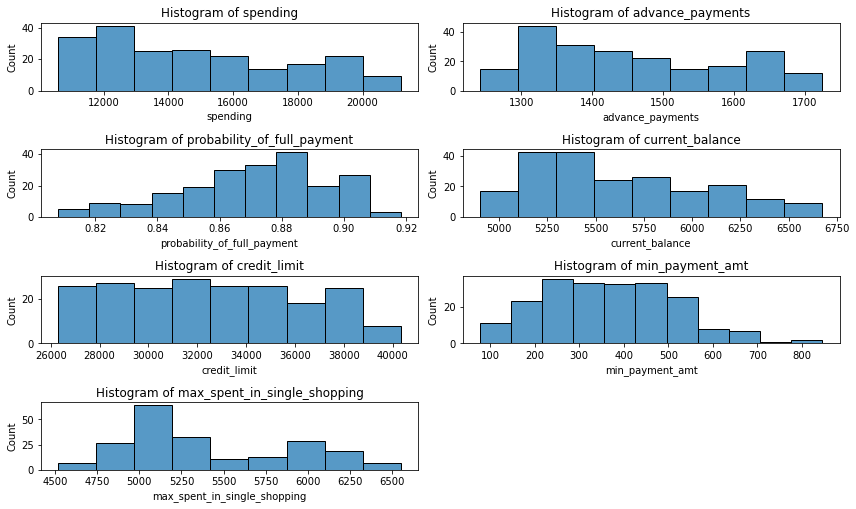

In [24]:
plt.figure(figsize = (12,12))
feature_list = bank.columns
for i in range(len(feature_list)):
    plt.subplot(7,2, i + 1)
    sns.histplot(x = bank[feature_list[i]], data = bank)
    plt.title('Histogram of {}'.format(feature_list[i])) 
    plt.tight_layout()

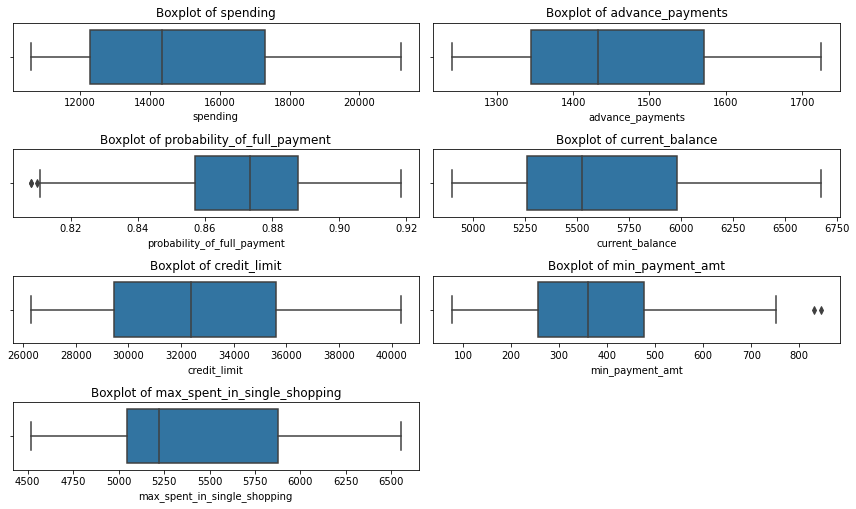

In [25]:
plt.figure(figsize = (12,12))
feature_list = bank.columns
for i in range(len(feature_list)):
    plt.subplot(7,2, i + 1)
    sns.boxplot(x = bank[feature_list[i]], data = bank)
    plt.title('Boxplot of {}'.format(feature_list[i])) 
    plt.tight_layout()

Histogram : 

Spending & credit limit - not normally distributed

Advance payments, max_spent_in_single_shopping - bimodal

Probability of full payment - left skewed and has normal distribution

Current balance,min_payment_amt	- right skewed and normal distribution


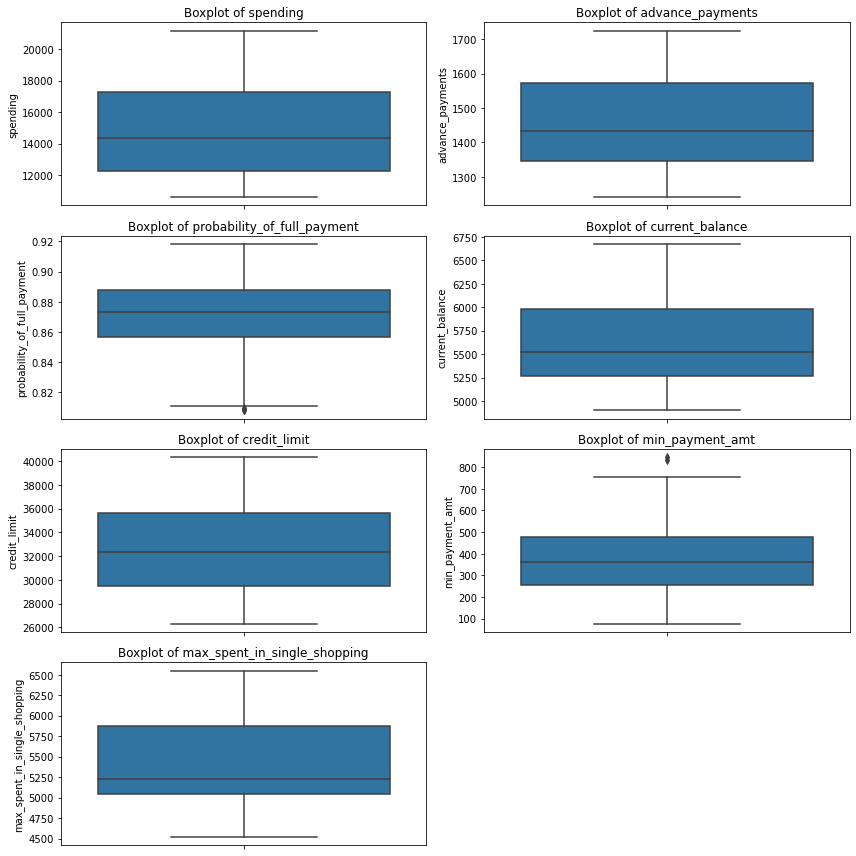

In [26]:
plt.figure(figsize = (12,12))
feature_list = bank.columns
for i in range(len(feature_list)):
    plt.subplot(4,2, i + 1)
    sns.boxplot(y = bank[feature_list[i]], data = bank)
    plt.title('Boxplot of {}'.format(feature_list[i])) 
    plt.tight_layout()

we see from the box plot that the variable minimum payment amount and probability of full payment has outlier. let us treat it before proceeding further.

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [28]:
low,up=remove_outlier(bank['min_payment_amt'])
print("lower range",low, "and upper range", up)

lower range -74.93750000000006 and upper range 807.9625000000001


In [29]:
bank['min_payment_amt']=np.where(bank['min_payment_amt']>up,up,bank['min_payment_amt'])
bank['min_payment_amt']=np.where(bank['min_payment_amt']<low,low,bank['min_payment_amt'])

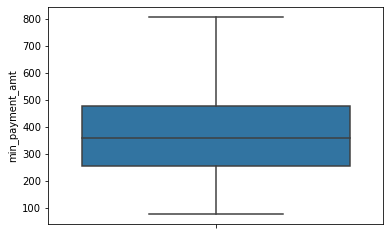

In [30]:
sns.boxplot(y = bank['min_payment_amt']);

In [31]:
low,up=remove_outlier(bank['probability_of_full_payment'])
print("lower range",low, "and upper range", up)

lower range 0.8105875 and upper range 0.9340875


In [32]:
bank['probability_of_full_payment']=np.where(bank['probability_of_full_payment']>up,up,bank['probability_of_full_payment'])
bank['probability_of_full_payment']=np.where(bank['probability_of_full_payment']<low,low,bank['probability_of_full_payment'])

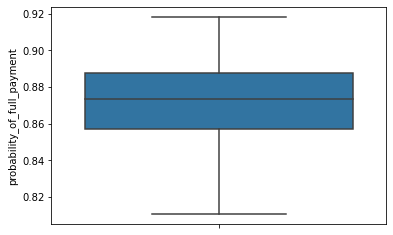

In [33]:
sns.boxplot(y = bank['probability_of_full_payment']);

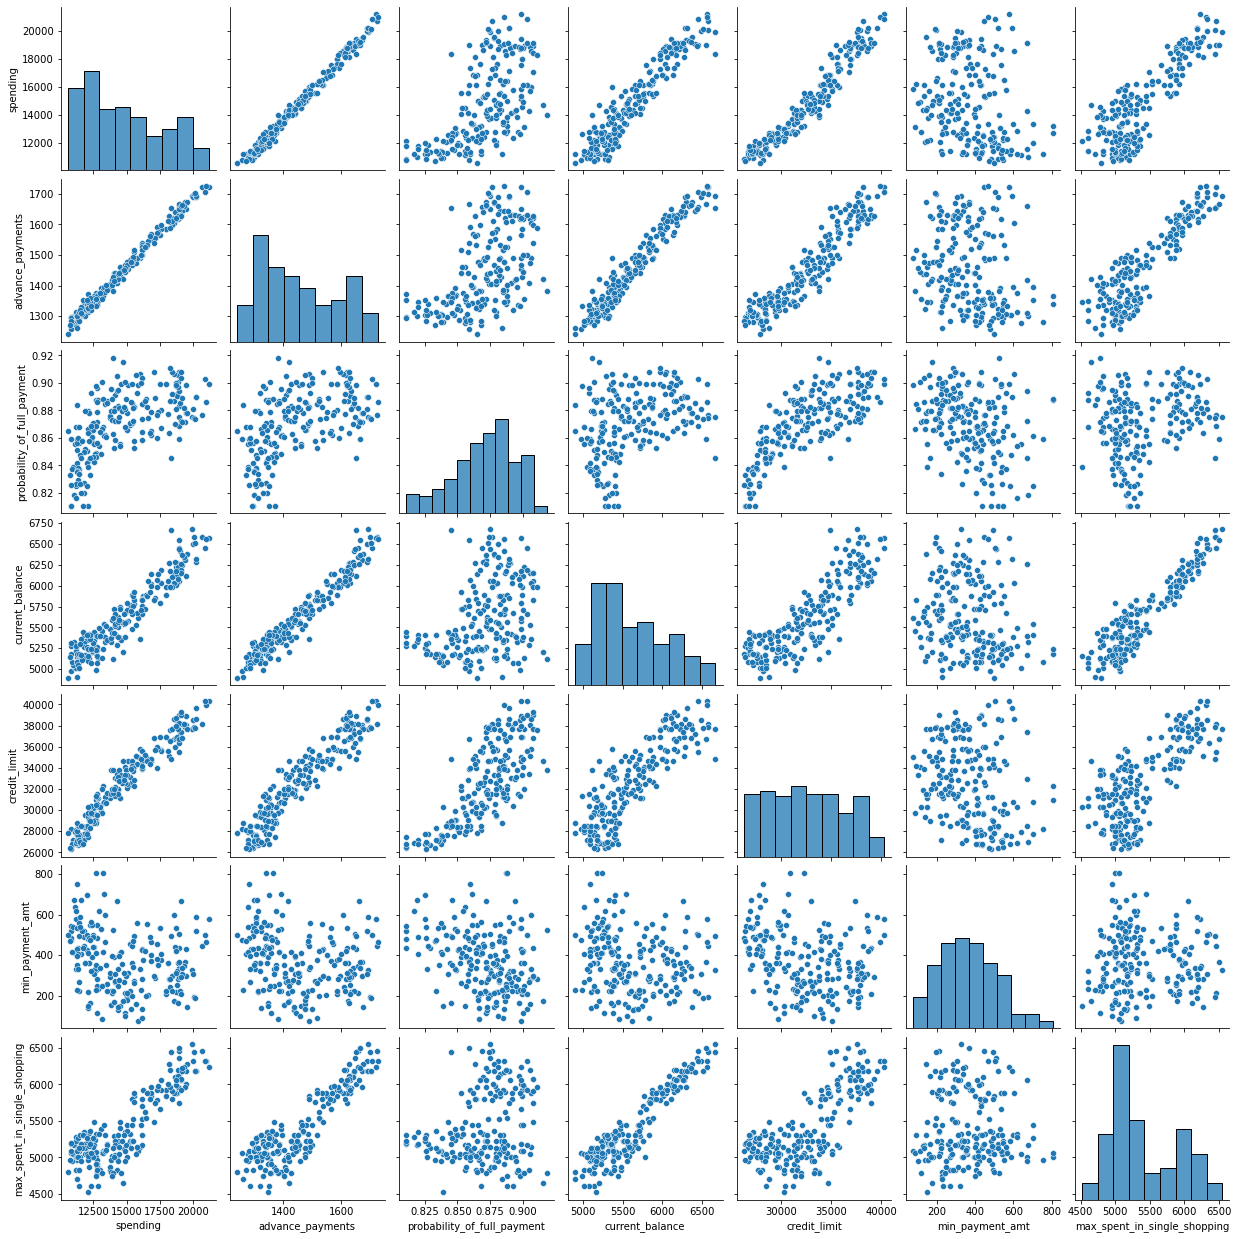

In [34]:
sns.pairplot(bank)

The variables -min_payment_amt does not seem to have any relation with other variables as they are clustered and does not show any pattern.

In [35]:
corr = bank.corr()
round(corr,2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.00,0.99,0.61,0.95,0.97,-0.23,0.86
advance_payments,0.99,1.00,0.53,0.97,0.94,-0.22,0.89
probability_of_full_payment,0.61,0.53,1.00,0.37,0.76,-0.34,0.23
current_balance,0.95,0.97,0.37,1.00,0.86,-0.17,0.93
credit_limit,0.97,0.94,0.76,0.86,1.00,-0.26,0.75
min_payment_amt,-0.23,-0.22,-0.34,-0.17,-0.26,1.00,-0.01
max_spent_in_single_shopping,0.86,0.89,0.23,0.93,0.75,-0.01,1.00


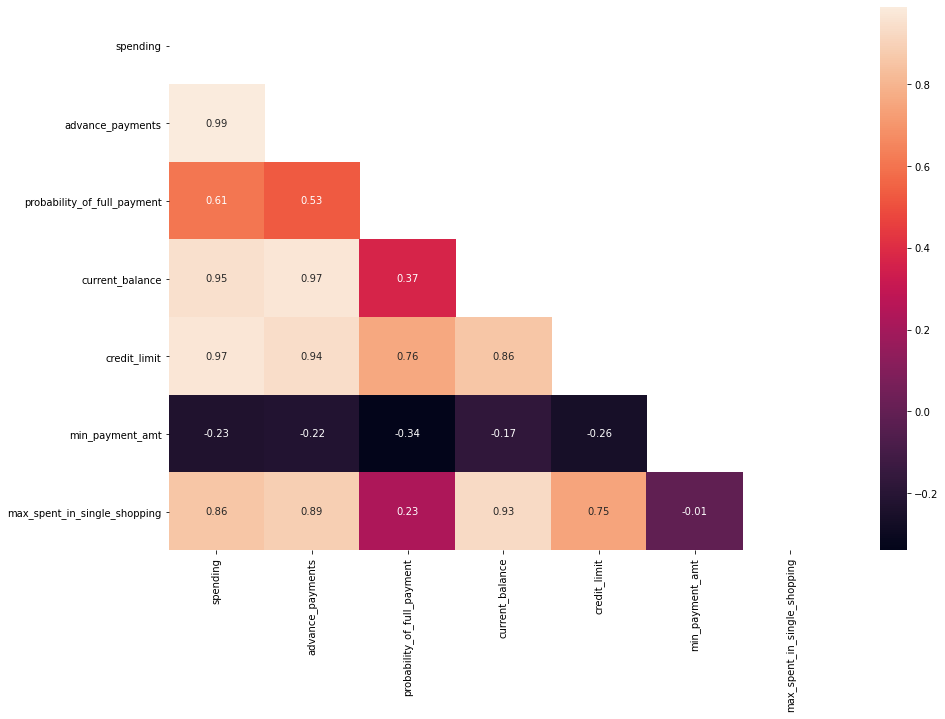

In [36]:
fig_dims = (15, 10)
fig = plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 
sns.heatmap(round(corr,2), annot=True, mask=mask);

we can see very good correlation between

spending & advance payments

spending & current balance

advance payments and  current balance

credit_limit with spending,advance payments, probability of full payment & current balance

Max spent in single shopping with spending, advance payments, current balance

Probability of full payment seem to have good relation with only credit limit but not with other variables.

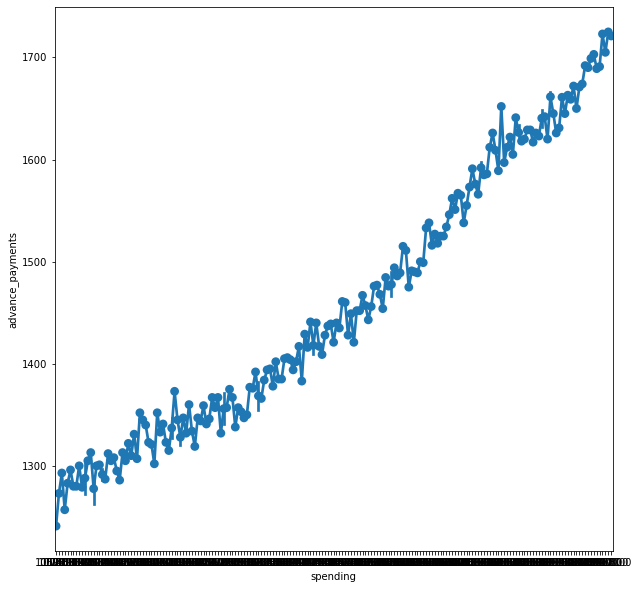

In [37]:
plt.figure(figsize = (10,10))
sns.pointplot(x = 'spending', y= 'advance_payments', data = bank);

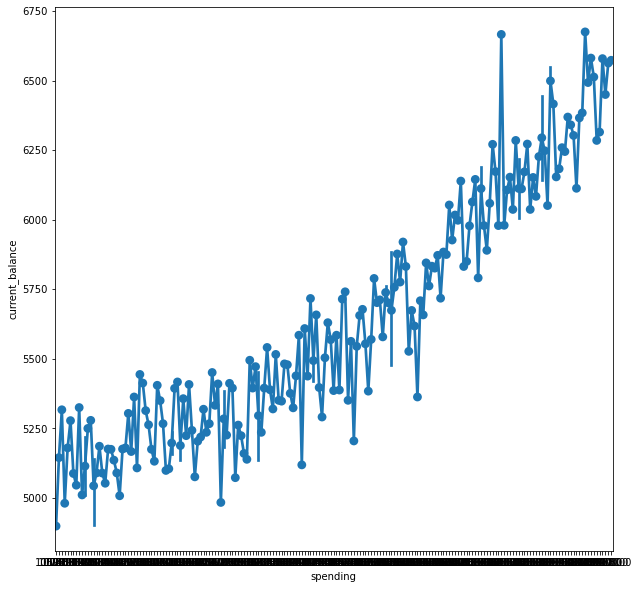

In [38]:
plt.figure(figsize = (10,10))
sns.pointplot(x = 'spending', y= 'current_balance', data = bank);

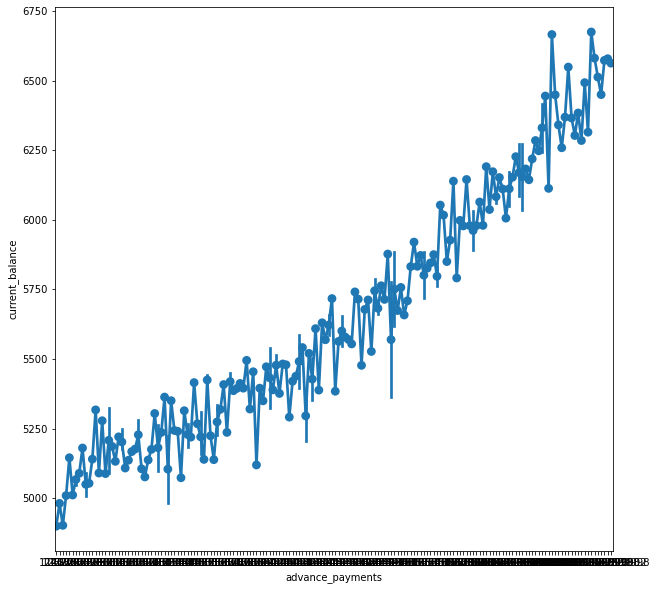

In [39]:
plt.figure(figsize = (10,10))
sns.pointplot(x = 'advance_payments', y= 'current_balance', data = bank);

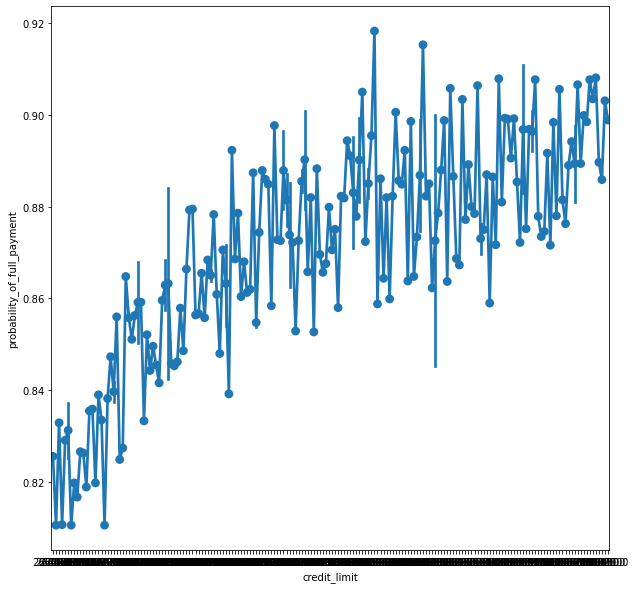

In [40]:
plt.figure(figsize = (10,10))
sns.pointplot(x = 'credit_limit', y= 'probability_of_full_payment', data = bank);

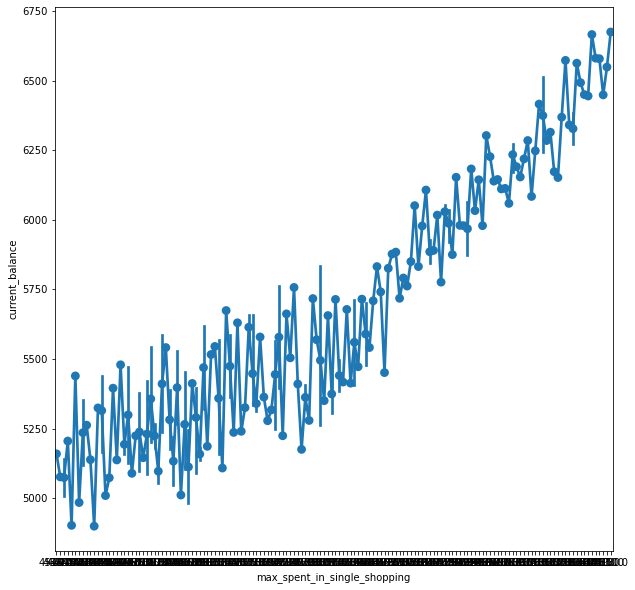

In [41]:
plt.figure(figsize = (10,10))
sns.pointplot(x = 'max_spent_in_single_shopping', y= 'current_balance', data = bank);

### 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [42]:
bank.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14847.523810,1455.928571,0.871025,5628.533333,32586.047619,369.728786,5408.071429
std,2909.699431,130.595873,0.023560,443.063478,3777.144449,149.468900,491.480499
min,10590.000000,1241.000000,0.810588,4899.000000,26300.000000,76.510000,4519.000000
25%,12270.000000,1345.000000,0.856900,5262.250000,29440.000000,256.150000,5045.000000
50%,14355.000000,1432.000000,0.873450,5523.500000,32370.000000,359.900000,5223.000000
75%,17305.000000,1571.500000,0.887775,5979.750000,35617.500000,476.875000,5877.000000
max,21180.000000,1725.000000,0.918300,6675.000000,40330.000000,807.962500,6550.000000


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
std = StandardScaler()
scaled_bank = pd.DataFrame(std.fit_transform(bank),columns=bank.columns)

In [45]:
scaled_bank

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.722220,-0.428801,-0.158181,0.193620,-1.366631
206,0.662292,0.814152,-0.307399,0.675253,0.476084,0.819993,0.789153
207,-0.281636,-0.306472,0.364831,-0.431064,-0.152873,-1.328049,-0.830235
208,0.438367,0.338271,1.232775,0.182048,0.600814,-0.957188,0.071238


In [46]:
scaled_bank.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,1.340198e-16,7.602384e-16,1.642601e-15,-9.828117e-16,1.784948e-16,-4.810966e-17,2.891867e-16
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.571391e+00,-1.650501e+00,-1.668209e+00,-1.966425e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-6.009681e-01,-8.286816e-01,-8.349072e-01,-7.616981e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.031721e-01,-2.376280e-01,-5.733534e-02,-6.591519e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.126469e-01,7.945947e-01,8.044956e-01,7.185591e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.011371e+00,2.367533e+00,2.055112e+00,2.938945e+00,2.328998e+00


scaling to be done because some variables are in hundreds and some are in thousands. since the ranges are different, we need to scale them .

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

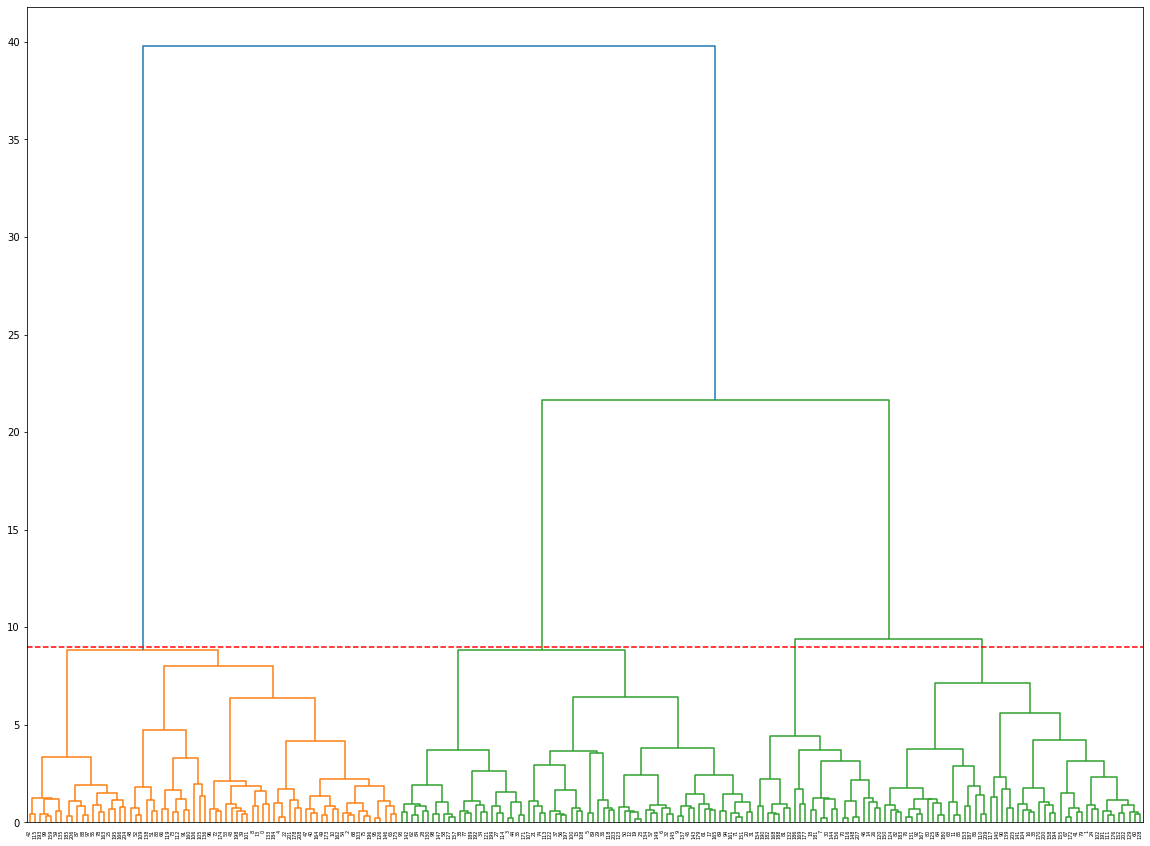

In [48]:
wardlink1 = linkage(scaled_bank, method = 'ward')
plt.figure(figsize=(20,15))
dend = dendrogram(wardlink1)
plt.axhline(y=9, color='r', linestyle='--')

From the above dendogram using 'ward's linkage' method, we see that the height of the vertical line below the distance parameter is 10 is much smaller which means the clusters are almost similar to each other. Hence the optimal no of clusters which are widely different from each other is 3 as their distances are much higher than other clusters down.However, it would be better to have few more no of clusters. 

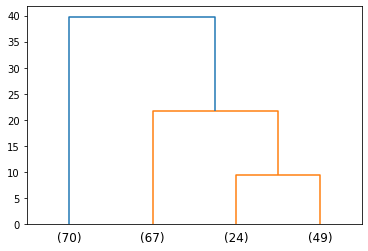

In [49]:
dend = dendrogram(wardlink1,
                 truncate_mode='lastp',
                 p = 4,
                 )

In [50]:
clusters1 = fcluster(wardlink1, 4, criterion='maxclust')
clusters1

array([1, 4, 1, 2, 1, 2, 2, 3, 1, 2, 1, 4, 2, 1, 3, 2, 4, 2, 3, 2, 2, 2,
       1, 2, 4, 1, 3, 2, 2, 2, 3, 2, 2, 4, 2, 2, 2, 2, 2, 1, 1, 4, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 4, 2, 2, 4, 4, 1,
       1, 4, 1, 2, 3, 2, 1, 1, 2, 1, 4, 2, 1, 4, 4, 3, 4, 1, 2, 4, 4, 1,
       1, 2, 4, 1, 4, 2, 2, 1, 1, 1, 2, 1, 2, 1, 4, 1, 4, 1, 1, 2, 2, 1,
       4, 4, 1, 2, 2, 1, 3, 4, 2, 1, 3, 2, 2, 2, 4, 4, 1, 2, 4, 4, 2, 4,
       3, 1, 2, 1, 1, 2, 1, 4, 4, 4, 2, 2, 3, 2, 1, 2, 3, 2, 4, 2, 4, 4,
       3, 4, 3, 2, 4, 1, 1, 2, 1, 1, 1, 2, 1, 4, 3, 3, 4, 2, 4, 1, 1, 1,
       4, 3, 1, 2, 4, 3, 3, 4, 1, 1, 3, 4, 3, 2, 3, 4, 2, 1, 4, 1, 1, 2,
       1, 2, 4, 1, 4, 2, 1, 4, 1, 3, 1, 4], dtype=int32)

In [51]:
bank_hierarchical1 = scaled_bank.copy(deep = True)
bank_hierarchical1['Cluster No'] = clusters1
bank_hierarchical1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster No
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998,1
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582,4
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107,1
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961,2
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813,1


Text(0.5, 1.0, 'Spending vs Advance payment for all clusters')

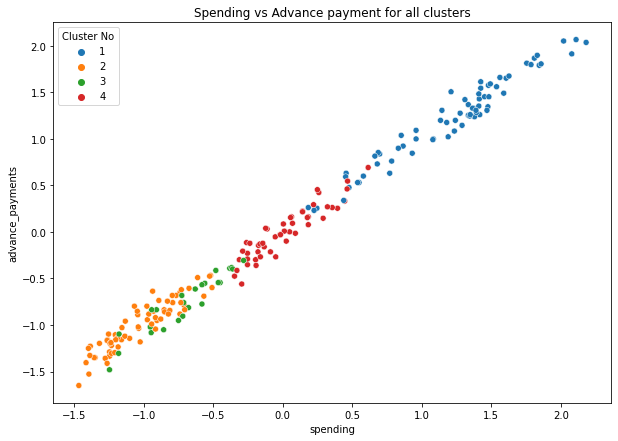

In [52]:

plt.figure(figsize=(10, 7))  
sns.scatterplot(data=bank_hierarchical1, x='spending', y='advance_payments', hue='Cluster No', palette='tab10') # kind='scatter')

plt.title("Spending vs Advance payment for all clusters")

Text(0.5, 1.0, 'Spending vs max_spent_in_single_shopping for all clusters')

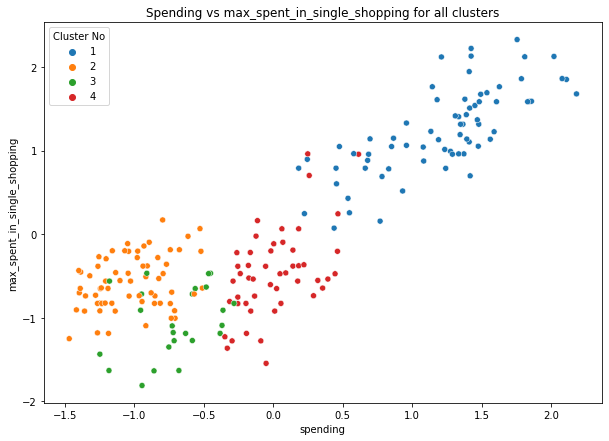

In [53]:
plt.figure(figsize=(10, 7))  
sns.scatterplot(data=bank_hierarchical1, x='spending', y='max_spent_in_single_shopping', hue='Cluster No', palette='tab10') 

plt.title("Spending vs max_spent_in_single_shopping for all clusters")

Text(0.5, 1.0, 'Spending vs credit_limit for all clusters')

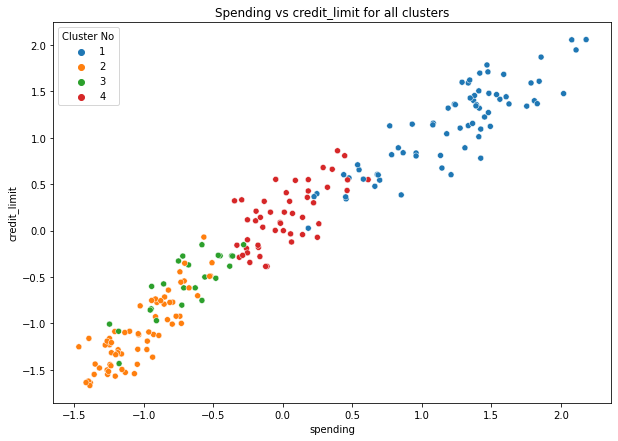

In [54]:
plt.figure(figsize=(10, 7))  
sns.scatterplot(data=bank_hierarchical1, x='spending', y='credit_limit', hue='Cluster No', palette='tab10')

plt.title("Spending vs credit_limit for all clusters")

Text(0.5, 1.0, 'probability_of_full_payment vs credit_limit for all clusters')

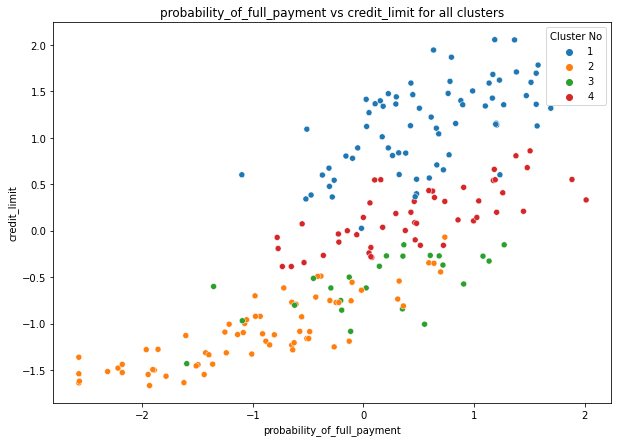

In [55]:
plt.figure(figsize=(10, 7))  
sns.scatterplot(data=bank_hierarchical1, x='probability_of_full_payment', y='credit_limit', hue='Cluster No', palette='tab10')

plt.title("probability_of_full_payment vs credit_limit for all clusters")

<AxesSubplot:xlabel='Cluster No', ylabel='spending'>

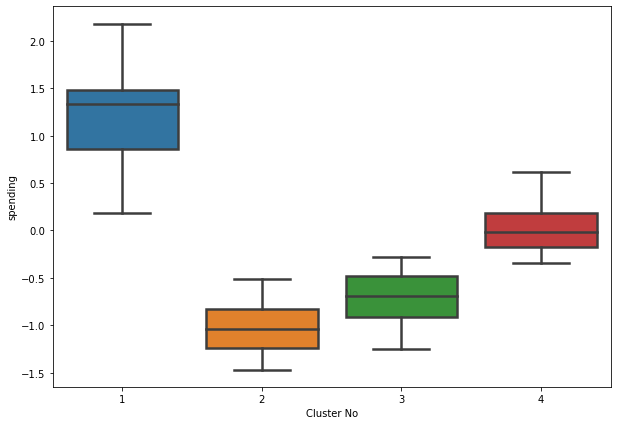

In [56]:
plt.figure(figsize=(10, 7))  
sns.boxplot(data=bank_hierarchical1, x ='Cluster No' , y = 'spending', linewidth=2.5) 

<AxesSubplot:xlabel='Cluster No', ylabel='advance_payments'>

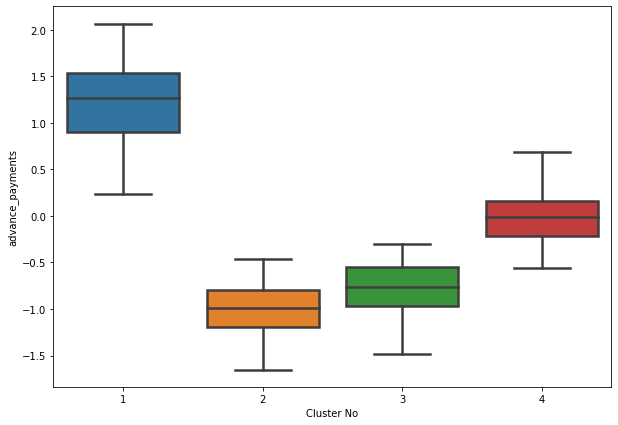

In [57]:
plt.figure(figsize=(10, 7))  
sns.boxplot(data=bank_hierarchical1, x ='Cluster No' , y = 'advance_payments', linewidth=2.5) 

<AxesSubplot:xlabel='Cluster No', ylabel='probability_of_full_payment'>

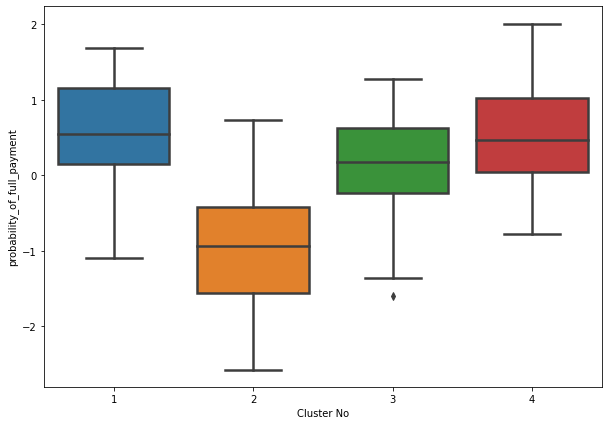

In [58]:
plt.figure(figsize=(10, 7))  
sns.boxplot(data=bank_hierarchical1, x ='Cluster No' , y = 'probability_of_full_payment', linewidth=2.5) 

<AxesSubplot:xlabel='Cluster No', ylabel='current_balance'>

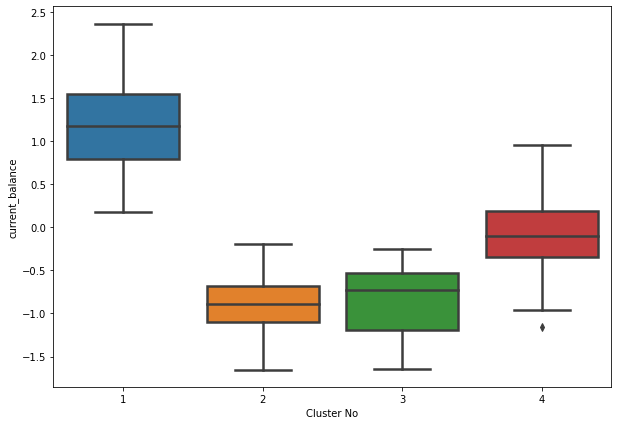

In [59]:
plt.figure(figsize=(10, 7))  
sns.boxplot(data=bank_hierarchical1, x ='Cluster No' , y = 'current_balance', linewidth=2.5) 

<AxesSubplot:xlabel='Cluster No', ylabel='credit_limit'>

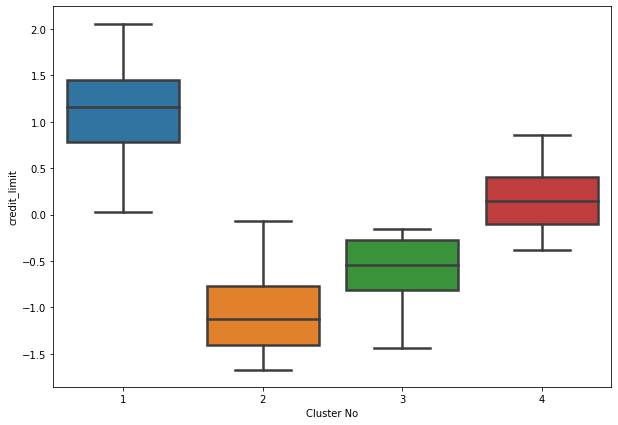

In [60]:
plt.figure(figsize=(10, 7))  
sns.boxplot(data=bank_hierarchical1, x ='Cluster No' , y = 'credit_limit', linewidth=2.5) 

<AxesSubplot:xlabel='Cluster No', ylabel='min_payment_amt'>

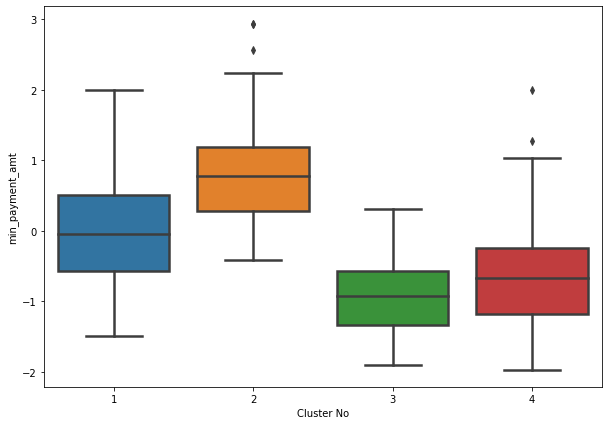

In [61]:
plt.figure(figsize=(10, 7))  
sns.boxplot(data=bank_hierarchical1, x ='Cluster No' , y = 'min_payment_amt', linewidth=2.5) 

<AxesSubplot:xlabel='Cluster No', ylabel='max_spent_in_single_shopping'>

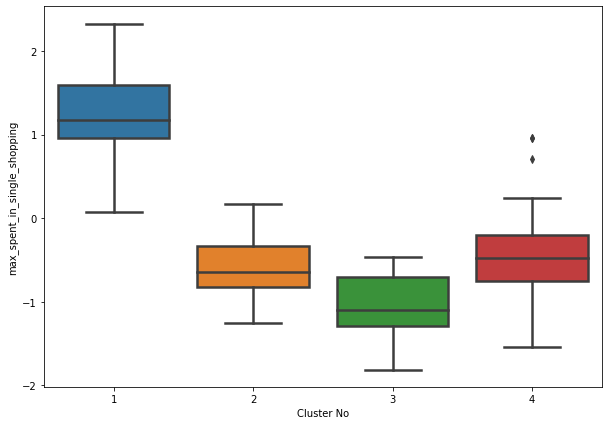

In [62]:
plt.figure(figsize=(10, 7))  
sns.boxplot(data=bank_hierarchical1, x ='Cluster No' , y = 'max_spent_in_single_shopping', linewidth=2.5) 

In [63]:
bank_hierarchical1.groupby('Cluster No').mean()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
Cluster No,,,,,,,
1,1.213983,1.217445,0.569053,1.198256,1.130594,-0.038984,1.242686
2,-1.024932,-0.999559,-0.973049,-0.881418,-1.088249,0.833608,-0.583025
3,-0.705801,-0.762845,0.097322,-0.846310,-0.580140,-0.889367,-1.048464
4,0.012875,0.001175,0.469895,-0.092072,0.157029,-0.648531,-0.464534


From the above results we see that,

cluster 1  seem to have higher spending,advance payments, probability_of_full_payment, current balance, credit limit,max_spent_in_single_shopping except minimum payment amount whi1ch anyways is inversely proportional to other variables.

cluster 4 seem to have medium spending,advance payments, probability_of_full_payment, current balance, credit limit,max_spent_in_single_shopping .

cluster 2 & 3 seem to have the least spending,advance payments, probability_of_full_payment, current balance, credit limit,max_spent_in_single_shopping .

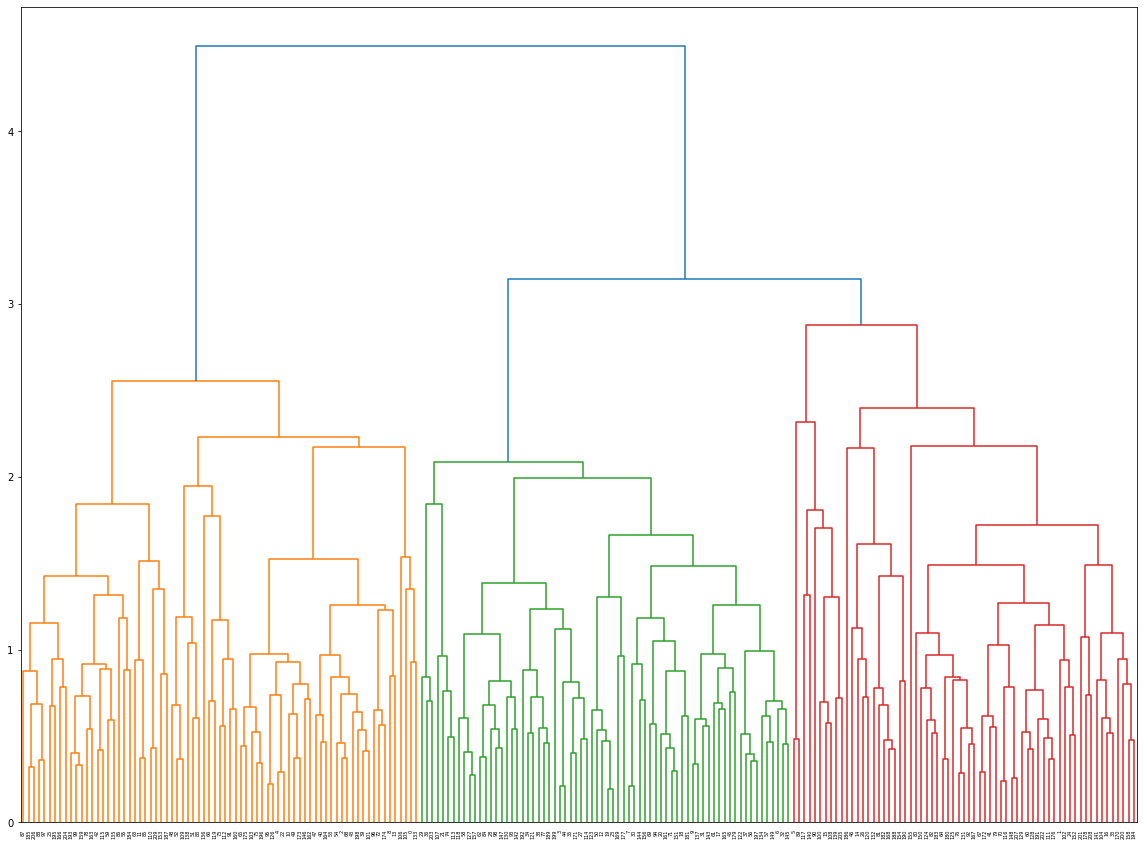

In [64]:
wardlink2 = linkage(scaled_bank, method = 'average')
plt.figure(figsize=(20,15))
dend = dendrogram(wardlink2)

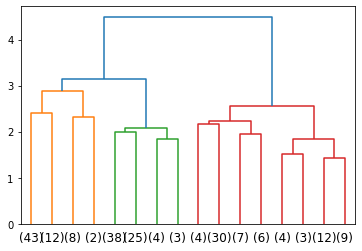

In [65]:
dend = dendrogram(wardlink2,distance_sort = 'descending',truncate_mode = 'level', p=3)

In [66]:
clusters2 = fcluster(wardlink2, 3, criterion='maxclust')
clusters2

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [67]:
bank_hierarchical2 = scaled_bank.copy(deep = True)
bank_hierarchical2_original = bank.copy(deep = True)

In [68]:
bank_hierarchical2['hierar_cluster2'] = clusters2
bank_hierarchical2_original['hierar_cluster2'] = clusters2

In [69]:
bank_hierarchical2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,hierar_cluster2
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998,1
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582,3
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107,1
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961,2
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813,1


In [70]:
bank_hierarchical2.groupby('hierar_cluster2').mean()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
hierar_cluster2,,,,,,,
1,1.130535,1.150339,0.449697,1.147523,1.033707,-0.031579,1.180824
2,-1.009613,-0.973474,-1.028763,-0.837618,-1.094982,0.618132,-0.597582
3,-0.217189,-0.278958,0.589017,-0.422014,-0.013527,-0.629243,-0.718939


In [71]:
bank_hierarchical2_original.groupby('hierar_cluster2').mean().sort_values(by = 'spending',ascending = False)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
hierar_cluster2,,,,,,,
1,18129.200000,1605.800000,0.881595,6135.746667,36481.200000,365.020000,5987.040000
3,14217.076923,1419.584615,0.884869,5442.000000,32535.076923,275.900692,5055.569231
2,11916.857143,1329.100000,0.846845,5258.300000,28460.000000,461.900000,5115.071429


### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [72]:
from sklearn.cluster import KMeans 

In [73]:
wss =[] 
for i in range(1,16):
    KM = KMeans(n_clusters=i,random_state = 0 )
    KM.fit(scaled_bank)
    wss.append(KM.inertia_)

In [74]:
wss

[1469.9999999999986,
 659.1474009548499,
 430.29848175122305,
 370.8685962394205,
 326.44648402430425,
 289.2533144267799,
 267.56176183107937,
 239.71459430002537,
 223.41361116824697,
 204.5385099175554,
 189.06770740317347,
 180.10299179947822,
 174.17329184925643,
 165.0157026166915,
 157.88458986504546]

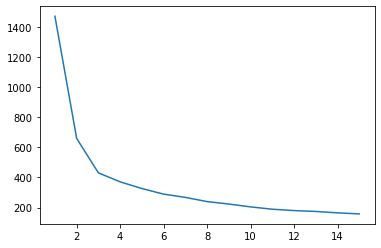

In [75]:
plt.plot(range(1,16), wss);

From the above plot of WSS ( Within sum of squares), there is significant slope upto k = 3 and after which the slope is quite less. Hence the optimal no of cluster is 3 from the above plot of wss or elbow curve.

In [76]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [77]:

for a in range(2,5):
    print('No. of clusters  = ',a , '\n')
    k_means = KMeans(n_clusters = a, random_state=123)
    k_means.fit(scaled_bank)
    print('The labels for ', a, 'clusters are as follows : \n')
    print(k_means.labels_)  
    print('\n For', a, 'no. of clusters, the silhouette score is :  ',silhouette_score(scaled_bank,k_means.labels_))
    print('\n ********************* \n')
    

No. of clusters  =  2 

The labels for  2 clusters are as follows : 

[0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0
 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0
 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0]

 For 2 no. of clusters, the silhouette score is :   0.46560100442748986

 ********************* 

No. of clusters  =  3 

The labels for  3 clusters are as follows : 

[0 2 0 1 0 1 1 2 0 1 0 2 1 0 2 1 2 1 1 1 1 1 0 1 2 0 2 1 1 1 2 1 1 2 1 1 1
 1 1 0 0 2 0 0 1 1 2 0 0 0 1 0 0 0 0 0 1 1 1 0 2 1 1 2 2 0 0 2 0 1 2 1 0 0
 1 0 2 1 0 2 2 2 2 0 1 2 0 2 0 1 2 0 2 1 1 0 0 0 1 0 2 0 2 0 2 0 0 1 1 0 2
 2 0 1 1 0 2 2 1 0 2 1 1 1 2 2 0 1 2 2 1 2 2 0 1 0 0 1 0 2 2 2 1 1 2 1 0 1
 2 1 2 1 2 2 1 2 2 1 2 0 0 1 0 0 0

From the above output , we see that the silhouette score for 2 no of clusters is 0.465 which is higher than the score for 3 or 4 no of clusters. Apparently , two cluster does not make any business sense . Hence we use 4 clusters though it's silhouette score is lesser. 

In [78]:
k_means = KMeans(n_clusters = 4, random_state=123)
k_means.fit(scaled_bank) 

KMeans(n_clusters=4, random_state=123)

In [79]:
bank_Kmeans = scaled_bank.copy(deep = True)
bank_Kmeans['Kmeans_cluster'] = k_means.labels_
sil_width = silhouette_samples(scaled_bank,k_means.labels_)
bank_Kmeans.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Kmeans_cluster
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998,1
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582,0
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107,1
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961,2
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813,1


In [80]:
bank_Kmeans["sil_width"] = sil_width
bank_Kmeans.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Kmeans_cluster,sil_width
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998,1,0.444635
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582,0,0.049665
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107,1,0.442409
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961,2,0.535517
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813,1,0.082111


In [81]:
bank_Kmeans.sil_width.sort_values(ascending = True) 

135   -0.054932
11    -0.039506
154   -0.011882
94    -0.003217
117   -0.003165
         ...   
171    0.582367
35     0.583778
58     0.587969
127    0.602801
157    0.607015
Name: sil_width, Length: 210, dtype: float64

In [82]:
k_means = KMeans(n_clusters = 3, random_state=123)
k_means.fit(scaled_bank) 

KMeans(n_clusters=3, random_state=123)

In [83]:
bank_Kmeans = scaled_bank.copy(deep = True)
bank_Kmeans['Kmeans_cluster'] = k_means.labels_
sil_width = silhouette_samples(scaled_bank,k_means.labels_)
bank_Kmeans.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Kmeans_cluster
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998,0
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582,2
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107,0
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961,1
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813,0


In [84]:
bank_Kmeans["sil_width"] = sil_width
bank_Kmeans.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Kmeans_cluster,sil_width
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998,0,0.573278
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582,2,0.365564
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107,0,0.637092
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961,1,0.515595
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813,0,0.360972


In [85]:
bank_Kmeans.sil_width.sort_values(ascending = True) 

190    0.002769
87     0.004485
144    0.006064
156    0.011564
117    0.019150
         ...   
54     0.618925
39     0.621701
68     0.631332
2      0.637092
101    0.638681
Name: sil_width, Length: 210, dtype: float64

we see that the minimum silhouette width is positive which shows that the mapping of all the observations are correct to its current centroid. 

In [86]:
bank_Kmeans.groupby('Kmeans_cluster').mean().sort_values(by = 'spending', ascending = False)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width
Kmeans_cluster,,,,,,,,
0,1.256682,1.261966,0.560989,1.237883,1.164852,-0.043534,1.292308,0.468077
2,-0.141119,-0.170043,0.449804,-0.257814,0.001647,-0.663892,-0.585893,0.338593
1,-1.030253,-1.006649,-0.965588,-0.897685,-1.085583,0.695182,-0.624809,0.399556


<AxesSubplot:xlabel='Kmeans_cluster', ylabel='spending'>

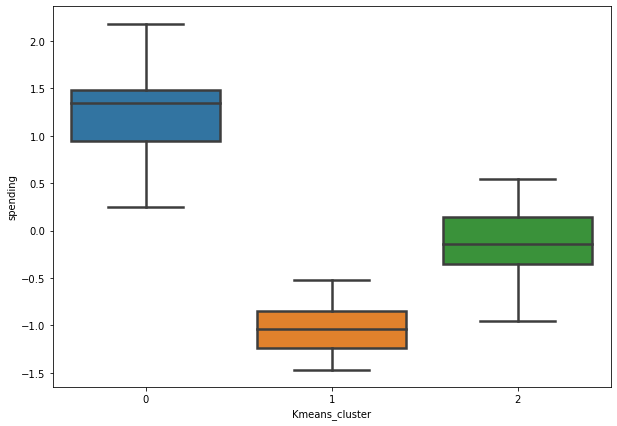

In [87]:
plt.figure(figsize=(10, 7))  
sns.boxplot(data=bank_Kmeans, x ='Kmeans_cluster' , y = 'spending', linewidth=2.5) 

<AxesSubplot:xlabel='Kmeans_cluster', ylabel='advance_payments'>

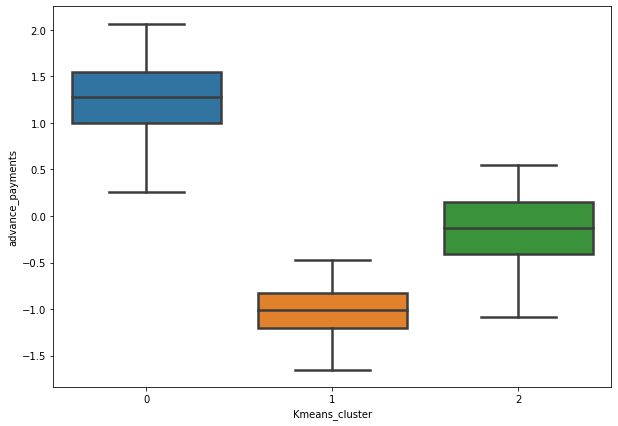

In [88]:
plt.figure(figsize=(10, 7))  
sns.boxplot(data=bank_Kmeans, x ='Kmeans_cluster' , y = 'advance_payments', linewidth=2.5) 

<AxesSubplot:xlabel='Kmeans_cluster', ylabel='probability_of_full_payment'>

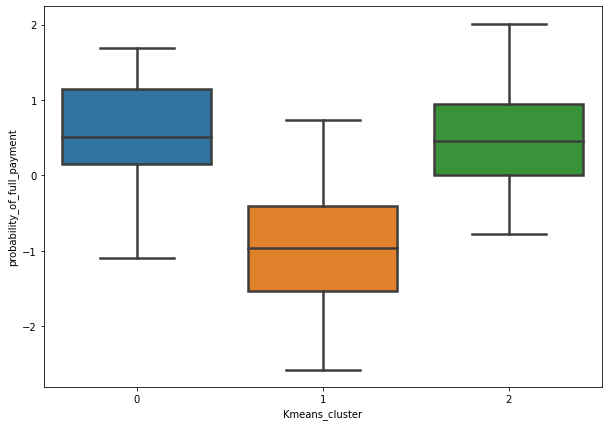

In [89]:
plt.figure(figsize=(10, 7))  
sns.boxplot(data=bank_Kmeans, x ='Kmeans_cluster' , y = 'probability_of_full_payment', linewidth=2.5) 

<AxesSubplot:xlabel='Kmeans_cluster', ylabel='current_balance'>

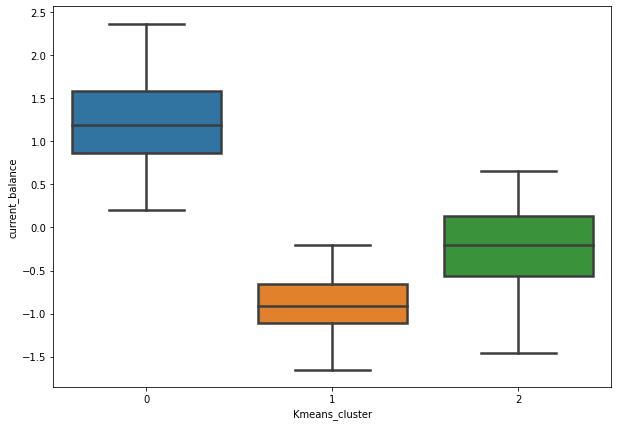

In [90]:
plt.figure(figsize=(10, 7))  
sns.boxplot(data=bank_Kmeans, x ='Kmeans_cluster' , y = 'current_balance', linewidth=2.5) 

<AxesSubplot:xlabel='Kmeans_cluster', ylabel='credit_limit'>

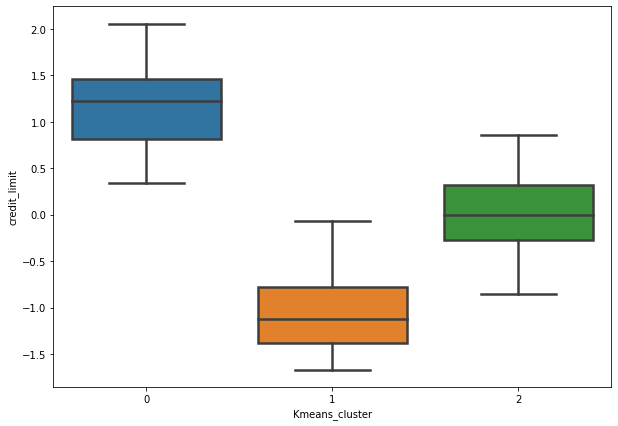

In [91]:
plt.figure(figsize=(10, 7))  
sns.boxplot(data=bank_Kmeans, x ='Kmeans_cluster' , y = 'credit_limit', linewidth=2.5) 

<AxesSubplot:xlabel='Kmeans_cluster', ylabel='max_spent_in_single_shopping'>

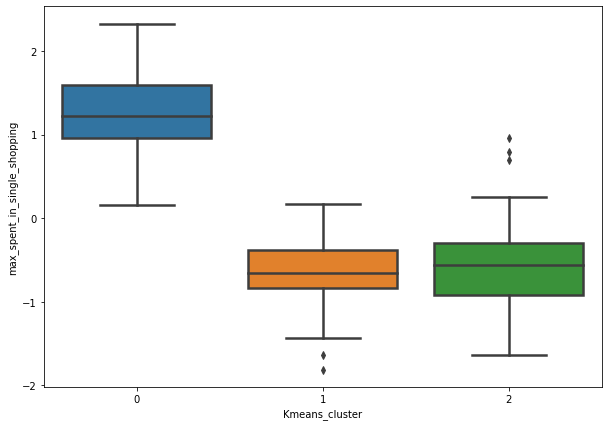

In [92]:
plt.figure(figsize=(10, 7))  
sns.boxplot(data=bank_Kmeans, x ='Kmeans_cluster' , y = 'max_spent_in_single_shopping', linewidth=2.5) 

### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

write from the denogram results


### Problem 2: CART-RF-ANN

### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [93]:
insurance = pd.read_csv('insurance_part2_data-2.csv')

In [94]:
insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [95]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [96]:
insurance = insurance.drop(['Channel'],axis = 1)

In [97]:
# insurance = insurance.drop(['Commision'],axis = 1)

In [98]:
insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,53,18.00,Bronze Plan,ASIA


In [99]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Duration      3000 non-null   int64  
 6   Sales         3000 non-null   float64
 7   Product Name  3000 non-null   object 
 8   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 211.1+ KB


out of 10 variables, 6 are of objects types.

totally 3000 entries and no null values.


In [100]:
insurance.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [101]:
insurance.duplicated().sum()

139

There are 139 rows which are duplicates.

In [102]:
insurance.drop_duplicates(keep='first',inplace=True)

In [103]:
insurance.duplicated().sum()

0

In [104]:
insurance.reset_index(drop = True, inplace = True)

In [105]:
insurance.describe()

,Age,Commision,Duration,Sales
count,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,15.080996,72.120238,61.757878
std,10.678106,25.826834,135.977200,71.399740
min,8.000000,0.000000,-1.000000,0.000000
25%,31.000000,0.000000,12.000000,20.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,66.000000,69.300000
max,84.000000,210.210000,4580.000000,539.000000


In [106]:
insurance[insurance.Duration == -1]

,Age,Agency_Code,Type,Claimed,Commision,Duration,Sales,Product Name,Destination
1458,25,JZI,Airlines,No,6.3,-1,18.0,Bronze Plan,ASIA


In [107]:
insurance.iloc[1458]

Age                      25
Agency_Code             JZI
Type               Airlines
Claimed                  No
Commision               6.3
Duration                 -1
Sales                  18.0
Product Name    Bronze Plan
Destination            ASIA
Name: 1458, dtype: object

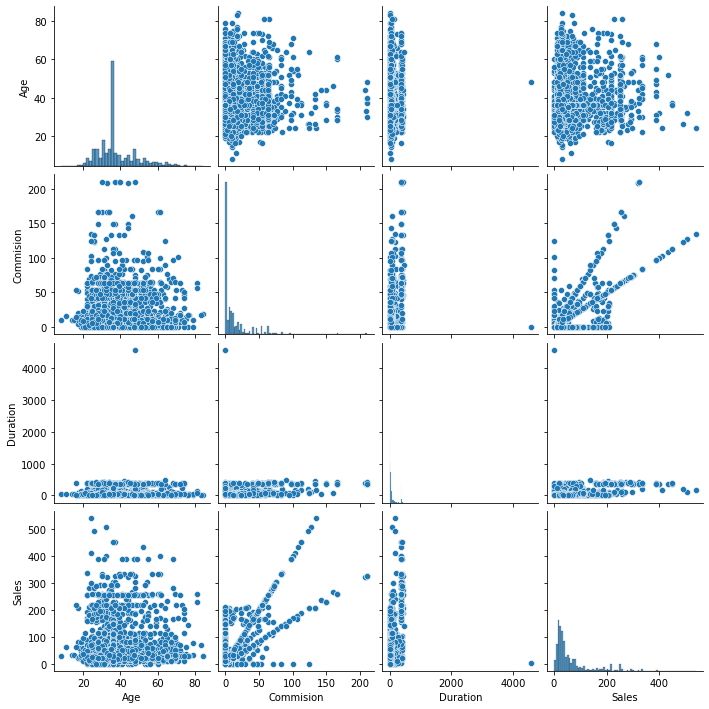

In [108]:
sns.pairplot(insurance)

<AxesSubplot:>

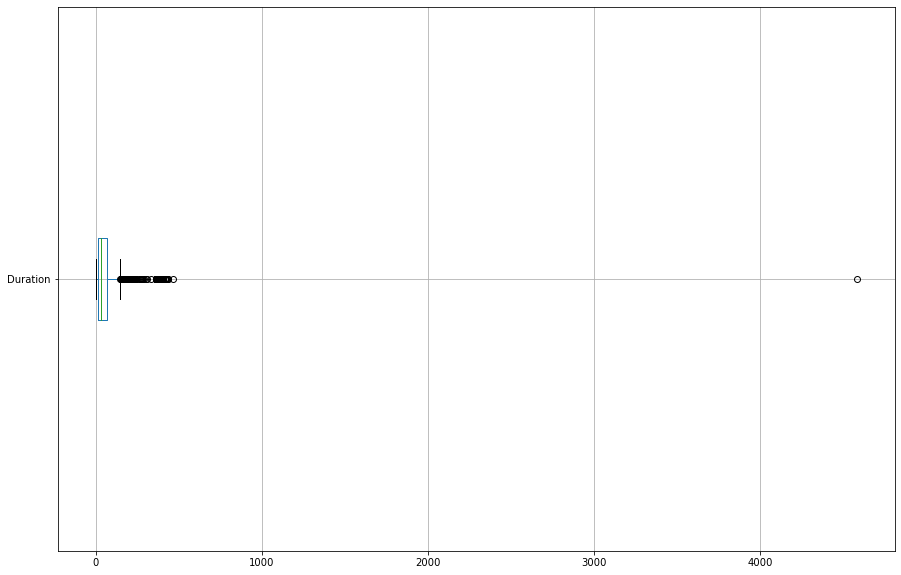

In [109]:
plt.figure(figsize = (15,10))
insurance[['Duration']].boxplot(vert = 0)

In [110]:
duration_low = insurance[(insurance['Product Name'] == 'Bronze Plan') & (insurance['Destination'] == 'ASIA')].Duration.median()

insurance.Duration.replace(to_replace=-1, value=duration_low, inplace= True)

In [111]:
insurance.iloc[1458]

Age                      25
Agency_Code             JZI
Type               Airlines
Claimed                  No
Commision               6.3
Duration                 18
Sales                  18.0
Product Name    Bronze Plan
Destination            ASIA
Name: 1458, dtype: object

In [112]:
insurance.Duration.max()

4580

In [113]:
insurance[insurance.Duration == 4580]

,Age,Agency_Code,Type,Claimed,Commision,Duration,Sales,Product Name,Destination
2718,48,C2B,Airlines,No,0.09,4580,0.32,Customised Plan,ASIA


In [114]:
duration_high = insurance[(insurance['Product Name'] == 'Customised Plan') & (insurance['Destination'] == 'ASIA')].Duration.median()

insurance.Duration.replace(to_replace=4580, value=duration_high, inplace= True)

In [115]:
insurance.iloc[2718]

Age                          48
Agency_Code                 C2B
Type                   Airlines
Claimed                      No
Commision                  0.09
Duration                     25
Sales                      0.32
Product Name    Customised Plan
Destination                ASIA
Name: 2718, dtype: object

In [116]:
insurance.describe()

,Age,Commision,Duration,Sales
count,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,15.080996,70.534778,61.757878
std,10.678106,25.826834,106.686351,71.399740
min,8.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,12.000000,20.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,65.000000,69.300000
max,84.000000,210.210000,466.000000,539.000000


In [117]:
insurance[insurance.Duration == 0]

,Age,Agency_Code,Type,Claimed,Commision,Duration,Sales,Product Name,Destination
1679,48,C2B,Airlines,No,0.14,0,0.51,Customised Plan,ASIA
2513,37,C2B,Airlines,No,49.60,0,124.00,Bronze Plan,ASIA


In [118]:
duration_0 = insurance[(insurance['Destination'] == 'ASIA')].Duration.median()

insurance.Duration.replace(to_replace=0, value=duration_0, inplace= True)


In [119]:
insurance[insurance.Duration == 0]

,Age,Agency_Code,Type,Claimed,Commision,Duration,Sales,Product Name,Destination


In [120]:
insurance.describe()

,Age,Commision,Duration,Sales
count,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,15.080996,70.552254,61.757878
std,10.678106,25.826834,106.676839,71.399740
min,8.000000,0.000000,1.000000,0.000000
25%,31.000000,0.000000,12.000000,20.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,65.000000,69.300000
max,84.000000,210.210000,466.000000,539.000000


In [121]:
#insurance[insurance.Commision == 0]

In [122]:
insurance[insurance.Sales == 0].value_counts().sum()

52

In [123]:
Sales_0 = insurance.Sales.median()
#Sales_0
insurance.Sales.replace(to_replace=0, value=Sales_0, inplace= True)

In [124]:
insurance.describe()

,Age,Commision,Duration,Sales
count,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,15.080996,70.552254,62.366756
std,10.678106,25.826834,106.676839,71.012142
min,8.000000,0.000000,1.000000,0.190000
25%,31.000000,0.000000,12.000000,21.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,65.000000,69.300000
max,84.000000,210.210000,466.000000,539.000000


<AxesSubplot:>

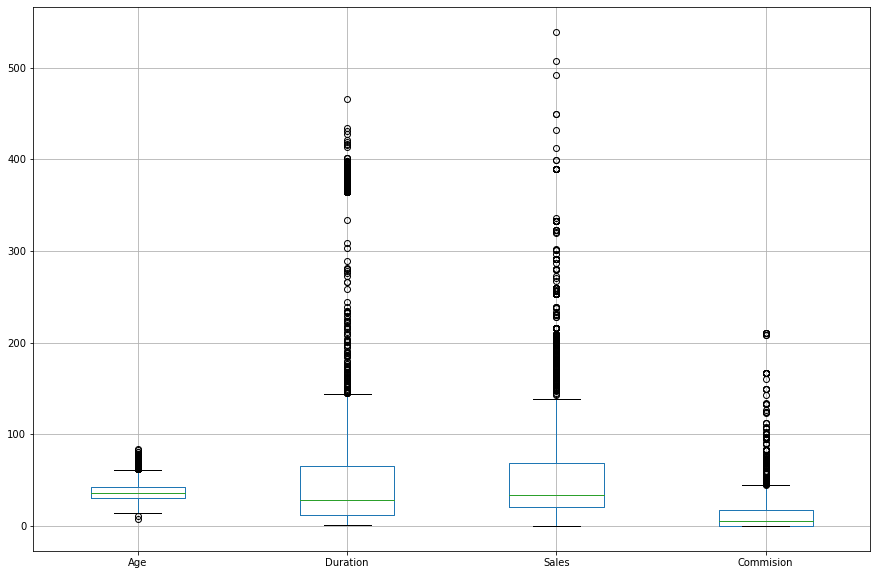

In [125]:
plt.figure(figsize = (15,10))
insurance[['Age', 'Duration', 'Sales','Commision']].boxplot()

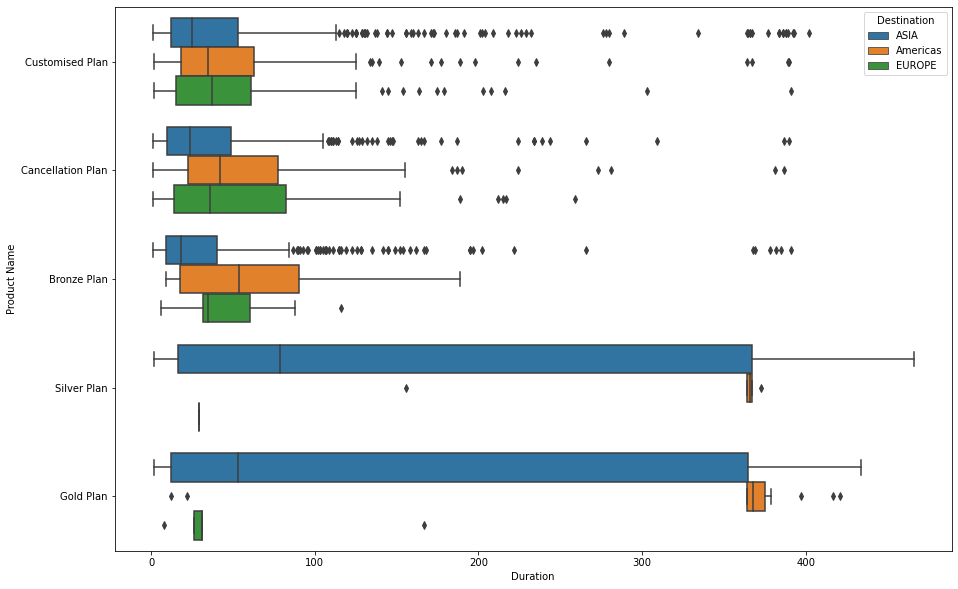

In [126]:
plt.figure(figsize = (15,10))
sns.boxplot(x='Duration',y = 'Product Name', hue = 'Destination', data = insurance);

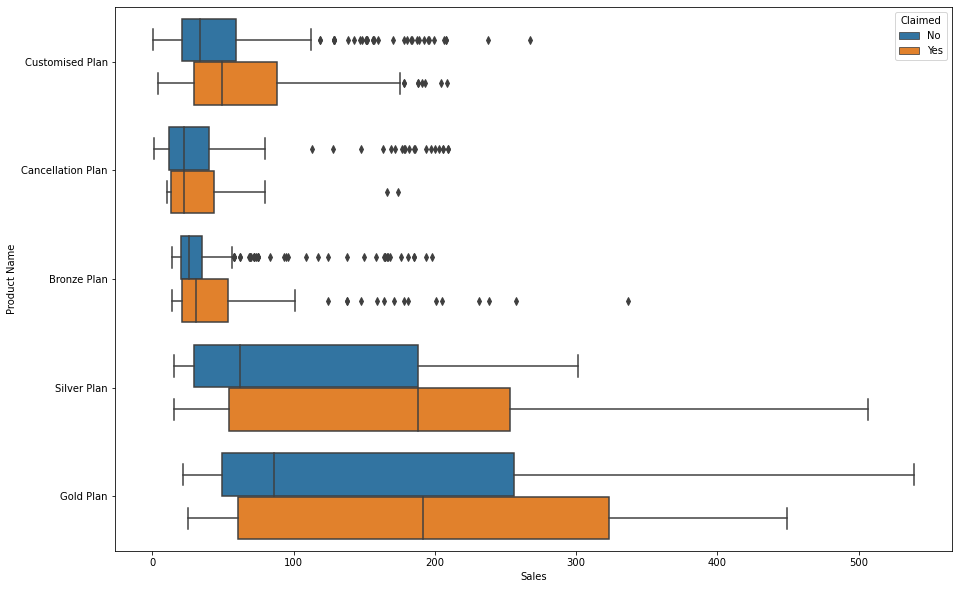

In [127]:
plt.figure(figsize = (15,10))
sns.boxplot(x='Sales',y = 'Product Name', hue = 'Claimed', data = insurance);

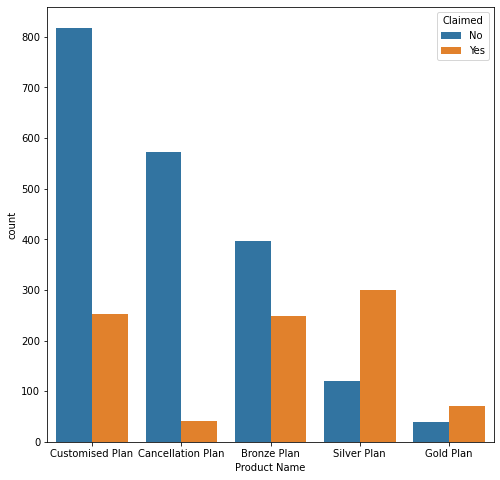

In [128]:
plt.figure(figsize = (8,8))
sns.countplot(x='Product Name', hue = 'Claimed', data = insurance);

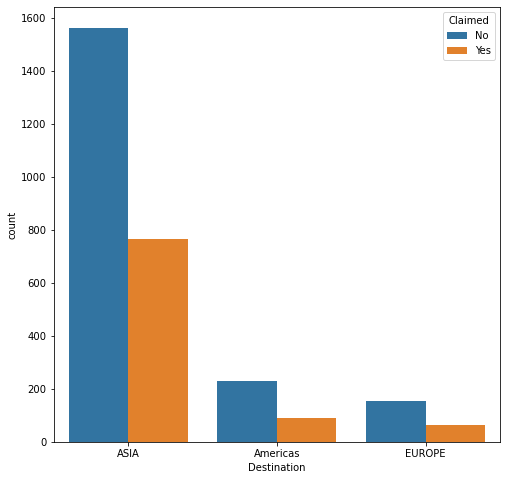

In [129]:
plt.figure(figsize = (8,8))
sns.countplot(x='Destination', hue = 'Claimed', data = insurance);

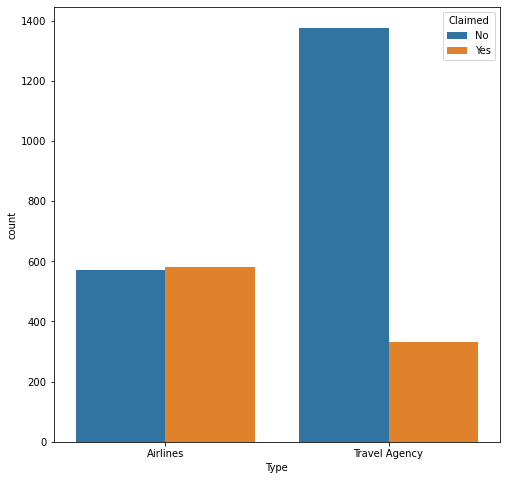

In [130]:
plt.figure(figsize = (8,8))
sns.countplot(x='Type', hue = 'Claimed', data = insurance);

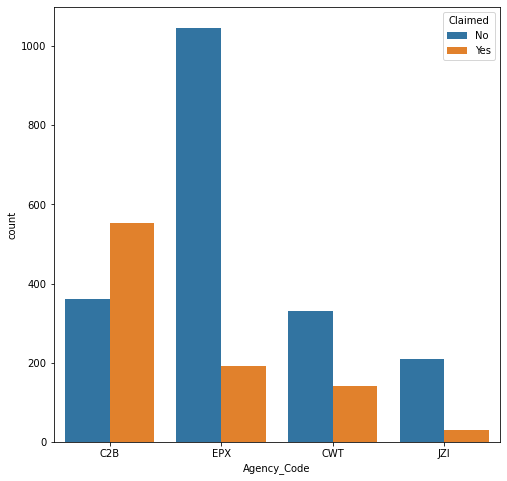

In [131]:
plt.figure(figsize = (8,8))
sns.countplot(x='Agency_Code', hue = 'Claimed', data = insurance);

In [132]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   object 
 2   Type          2861 non-null   object 
 3   Claimed       2861 non-null   object 
 4   Commision     2861 non-null   float64
 5   Duration      2861 non-null   int64  
 6   Sales         2861 non-null   float64
 7   Product Name  2861 non-null   object 
 8   Destination   2861 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 201.3+ KB


#### Checking unique values in all object type variables to see if any bad values are present

In [133]:
for column in insurance[['Agency_Code', 'Type', 'Claimed',  'Product Name', 'Destination']]:
    print(column.upper(),': ',insurance[column].nunique())
    print(insurance[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     471
C2B     913
EPX    1238
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1152
Travel Agency    1709
Name: Type, dtype: int64


CLAIMED :  2
Yes     914
No     1947
Name: Claimed, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           421
Cancellation Plan     615
Bronze Plan           645
Customised Plan      1071
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     319
ASIA        2327
Name: Destination, dtype: int64




#### From the above output , we can confirm that there are no bad values present in any of the object type variables. Now we can go ahead with converting them into categorical type.

In [134]:
for feature in insurance.columns: 
    if insurance[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(insurance[feature].unique()))
        print(pd.Categorical(insurance[feature].unique()).codes)
        insurance[feature] = pd.Categorical(insurance[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [135]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Duration      2861 non-null   int64  
 6   Sales         2861 non-null   float64
 7   Product Name  2861 non-null   int8   
 8   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 103.5 KB


lets check the relation between all independent variables with the dependent variable

<AxesSubplot:xlabel='Agency_Code'>

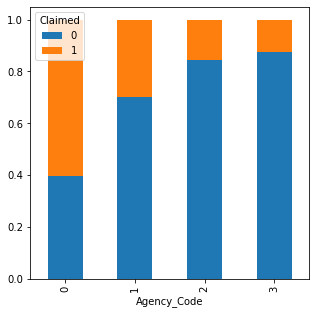

In [136]:
pd.crosstab(insurance['Agency_Code'],insurance['Claimed'],normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (5,5))

<AxesSubplot:xlabel='Type'>

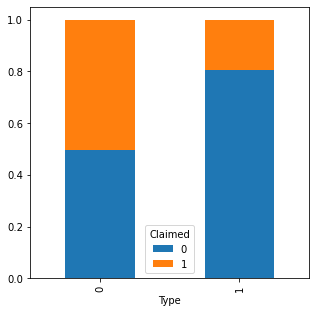

In [137]:
pd.crosstab(insurance['Type'],insurance['Claimed'],normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (5,5))

<AxesSubplot:xlabel='Product Name'>

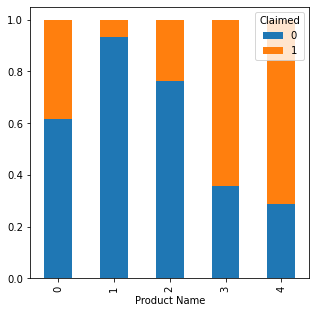

In [138]:
pd.crosstab(insurance['Product Name'],insurance['Claimed'],normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (5,5))

<AxesSubplot:xlabel='Destination'>

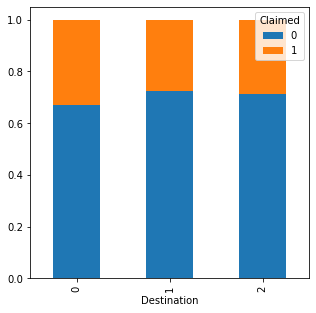

In [139]:
pd.crosstab(insurance['Destination'],insurance['Claimed'],normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (5,5))

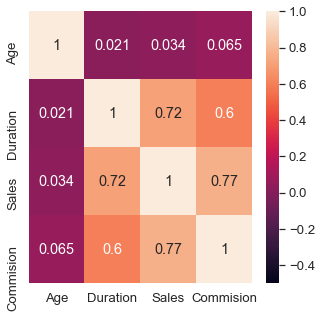

In [140]:
plt.figure(figsize=(5,5))  # for continuous variables
sns.set(font_scale=1.2)
sns.heatmap(insurance[['Age', 'Duration', 'Sales', 'Commision']].corr(), annot=True,vmin=-0.5,vmax=1);

### Proportion Claimed status

In [141]:
insurance.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

### Splitting the data into Train and Test set

In [142]:
insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,7,2.51,2,0
1,36,2,1,0,0.00,34,20.00,2,0
2,39,1,1,0,5.94,3,9.90,2,1
3,36,2,1,0,0.00,4,26.00,1,0
4,33,3,0,0,6.30,53,18.00,0,0


In [143]:
X = insurance.drop(["Claimed"], axis=1)

y = insurance.pop("Claimed")

In [144]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 123,stratify=y)

In [145]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (2288, 8)
X_test (573, 8)
y_train (2288,)
y_test (573,)


### Building a Decision Tree Classifier Model and fit it on the Training Set

In [146]:
from sklearn.model_selection import GridSearchCV

param_grid_dtc = {
    'max_depth': [10,12,14,15],   #10-15
    'min_samples_leaf': [15, 20, 25], #min sample split/3
    'min_samples_split': [45, 60, 100] #2-3% of training set
}

dtc = DecisionTreeClassifier(random_state =1)

grid_search_dtc = GridSearchCV(estimator = dtc, param_grid = param_grid_dtc, cv = 3,scoring = 'recall')

In [147]:
grid_search_dtc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [10, 12, 14, 15],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [45, 60, 100]},
             scoring='recall')

In [148]:
grid_search_dtc.best_params_

{'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 100}

In [149]:
best_grid_dtc = grid_search_dtc.best_estimator_

In [150]:
print(pd.DataFrame(best_grid_dtc.feature_importances_,columns=['Imp_features'],index=X_train.columns).sort_values('Imp_features',ascending=False))

              Imp_features
Agency_Code       0.522006
Sales             0.184156
Product Name      0.121949
Commision         0.079585
Duration          0.056001
Age               0.034061
Destination       0.002241
Type              0.000000


### Predictions on The training Set

In [151]:
y_train_predict_dtc = best_grid_dtc.predict(X_train)
y_test_predict_dtc = best_grid_dtc.predict(X_test)

### Check the Metrics for Predictions on the Training set

Accuracy for DecisionTreeClassifier model is 
 0.7937062937062938


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1557
           1       0.75      0.53      0.62       731

    accuracy                           0.79      2288
   macro avg       0.78      0.73      0.74      2288
weighted avg       0.79      0.79      0.78      2288



Confusion Matrix for DecisionTreeClassifier model is


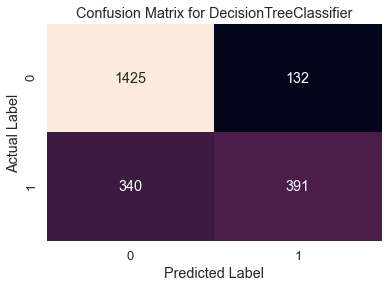

In [152]:
models_names={dtc:'DecisionTreeClassifier'}

print('Accuracy for {} model is'.format(models_names[dtc]),'\n',accuracy_score(y_train,y_train_predict_dtc))
print('\n')
print('Classification report for {} model is'.format(models_names[dtc]),'\n',classification_report(y_train,y_train_predict_dtc))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[dtc]))
sns.heatmap(confusion_matrix(y_train,y_train_predict_dtc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[dtc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

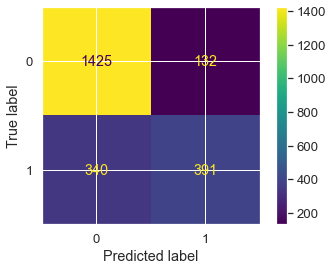

In [154]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
plot_confusion_matrix(best_grid_dtc,X_train,y_train)

In [155]:
best_grid_dtc.score(X_train,y_train) #_predict_dtc)

0.7937062937062938

### AUC and ROC for the train data

AUC: 0.844


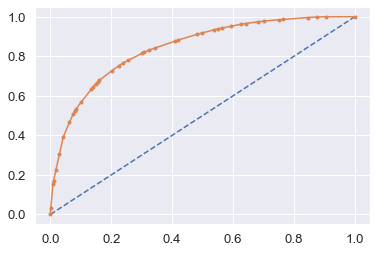

In [156]:
# predict probabilities
probs = best_grid_dtc.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Check the Metrics for Predictions on the Test set

Accuracy for DecisionTreeClassifier model is 
 0.7469458987783595


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       390
           1       0.64      0.48      0.55       183

    accuracy                           0.75       573
   macro avg       0.71      0.67      0.69       573
weighted avg       0.74      0.75      0.74       573



Confusion Matrix for DecisionTreeClassifier model is


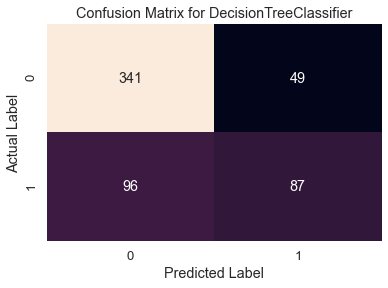

In [157]:
models_names={dtc:'DecisionTreeClassifier'}

print('Accuracy for {} model is'.format(models_names[dtc]),'\n',accuracy_score(y_test,y_test_predict_dtc))
print('\n')
print('Classification report for {} model is'.format(models_names[dtc]),'\n',classification_report(y_test,y_test_predict_dtc))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[dtc]))
sns.heatmap(confusion_matrix(y_test,y_test_predict_dtc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[dtc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

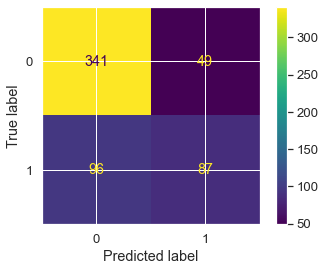

In [158]:
plot_confusion_matrix(best_grid_dtc,X_test,y_test)

In [159]:
best_grid_dtc.score(X_test,y_test)

0.7469458987783595

### AUC and ROC for the test data

AUC: 0.788


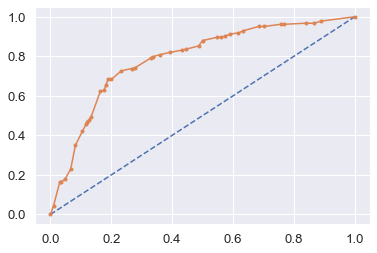

In [160]:
# predict probabilities
probs = best_grid_dtc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [161]:
# **************************************************************************************************************************

### Building a Random Forest Classifier Model and fit it on the Training Set

In [162]:
#from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'max_depth': [10,11,13,15],
    'max_features': [3,4], #sqrt of no of variables
    'min_samples_leaf': [15,20,30],
    'min_samples_split': [45,60, 100],
    'n_estimators': [101, 301]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid_rf, cv = 3,scoring='recall')



In [163]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 11, 13, 15], 'max_features': [3, 4],
                         'min_samples_leaf': [15, 20, 30],
                         'min_samples_split': [45, 60, 100],
                         'n_estimators': [101, 301]},
             scoring='recall')

In [164]:
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 15,
 'min_samples_split': 60,
 'n_estimators': 301}

In [165]:
best_grid_rf = grid_search_rf.best_estimator_

In [166]:
print(pd.DataFrame(best_grid_rf.feature_importances_,columns=['Imp_features'],index=X_train.columns).sort_values('Imp_features',ascending=False))

              Imp_features
Agency_Code       0.332726
Product Name      0.217739
Sales             0.162687
Commision         0.101957
Duration          0.079993
Age               0.052991
Type              0.040031
Destination       0.011876


### Predictions on The training Set

In [167]:
y_train_predict_rf = best_grid_rf.predict(X_train)
y_test_predict_rf = best_grid_rf.predict(X_test)

Accuracy for RandomForestClassifier model is 
 0.7954545454545454


Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1557
           1       0.72      0.58      0.65       731

    accuracy                           0.80      2288
   macro avg       0.77      0.74      0.75      2288
weighted avg       0.79      0.80      0.79      2288



Confusion Matrix for RandomForestClassifier model is


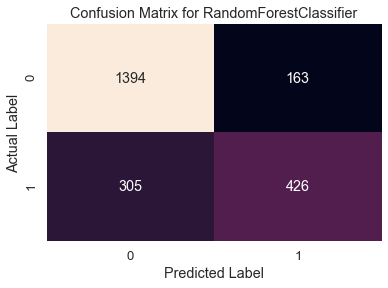

In [168]:
models_names={rfcl:'RandomForestClassifier'}

print('Accuracy for {} model is'.format(models_names[rfcl]),'\n',accuracy_score(y_train,y_train_predict_rf))
print('\n')
print('Classification report for {} model is'.format(models_names[rfcl]),'\n',classification_report(y_train,y_train_predict_rf))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[rfcl]))
sns.heatmap(confusion_matrix(y_train,y_train_predict_rf),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

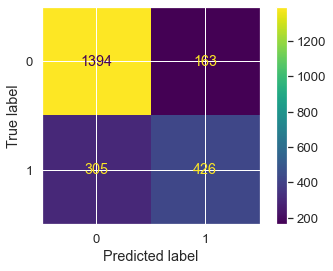

In [169]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
plot_confusion_matrix(best_grid_rf,X_train,y_train)

In [170]:
best_grid_rf.score(X_train,y_train)

0.7954545454545454

### AUC and ROC for the train data

AUC: 0.853


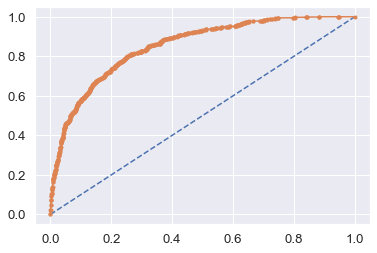

In [171]:
# predict probabilities
probs = best_grid_rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Check the Metrics for Predictions on the Test set

Accuracy for RandomForestClassifier model is 
 0.7591623036649214


Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       390
           1       0.63      0.58      0.61       183

    accuracy                           0.76       573
   macro avg       0.72      0.71      0.72       573
weighted avg       0.75      0.76      0.76       573



Confusion Matrix for RandomForestClassifier model is


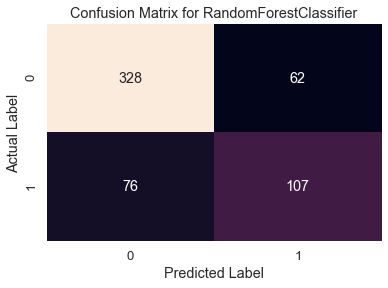

In [172]:
models_names={rfcl:'RandomForestClassifier'}

print('Accuracy for {} model is'.format(models_names[rfcl]),'\n',accuracy_score(y_test,y_test_predict_rf))
print('\n')
print('Classification report for {} model is'.format(models_names[rfcl]),'\n',classification_report(y_test,y_test_predict_rf))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[rfcl]))
sns.heatmap(confusion_matrix(y_test,y_test_predict_rf),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

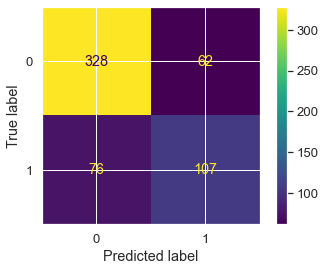

In [173]:
plot_confusion_matrix(best_grid_rf,X_test,y_test)

In [174]:
best_grid_rf.score(X_test,y_test)

0.7591623036649214

### AUC and ROC for the test data

AUC: 0.807


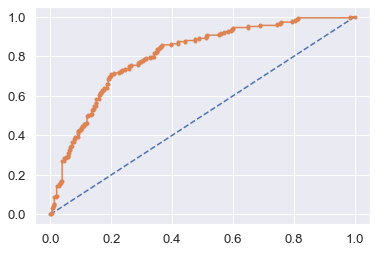

In [175]:
# predict probabilities
probs = best_grid_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Feature Scaling

In [176]:
sc=StandardScaler()

In [177]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Building an ANN Model and fit it on the Training Set

In [178]:
param_grid_ann = {
    'hidden_layer_sizes': [3,4,5], # (no.of i/p+o/p)/2
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.001,0.0001],
    'max_iter' : [10000]
}

ann = MLPClassifier(random_state=1)

grid_search_ann = GridSearchCV(estimator = ann, param_grid = param_grid_ann, cv = 3)

In [179]:
grid_search_ann.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [3, 4, 5], 'max_iter': [10000],
                         'solver': ['sgd', 'adam'], 'tol': [0.001, 0.0001]})

In [180]:
grid_search_ann.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 3,
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.0001}

In [181]:
best_grid_ann = grid_search_ann.best_estimator_

### Predictions on The training Set

In [182]:
y_train_predict_ann = best_grid_ann.predict(X_train)
y_test_predict_ann = best_grid_ann.predict(X_test)

Accuracy for MLPClassifier model is 
 0.7670454545454546


Classification report for MLPClassifier model is 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84      1557
           1       0.69      0.50      0.58       731

    accuracy                           0.77      2288
   macro avg       0.74      0.70      0.71      2288
weighted avg       0.76      0.77      0.76      2288



Confusion Matrix for MLPClassifier model is


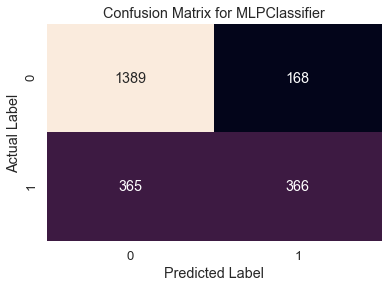

In [183]:
models_names={ann:'MLPClassifier'}

print('Accuracy for {} model is'.format(models_names[ann]),'\n',accuracy_score(y_train,y_train_predict_ann))
print('\n')
print('Classification report for {} model is'.format(models_names[ann]),'\n',classification_report(y_train,y_train_predict_ann))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[ann]))
sns.heatmap(confusion_matrix(y_train,y_train_predict_ann),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[ann]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

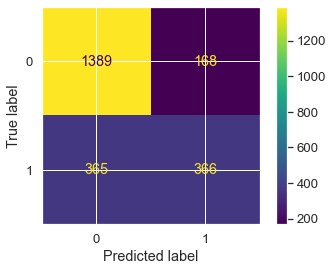

In [184]:
plot_confusion_matrix(best_grid_ann,X_train,y_train)

In [185]:
best_grid_ann.score(X_train,y_train)

0.7670454545454546

### AUC and ROC for the train data

AUC: 0.789


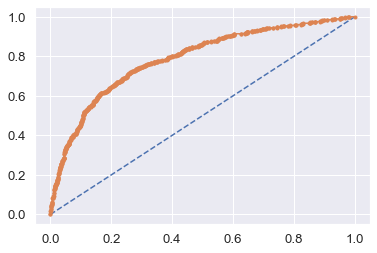

In [186]:
# predict probabilities
probs = best_grid_ann.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Check the Metrics for Predictions on the Test set

Accuracy for MLPClassifier model is 
 0.7521815008726004


Classification report for MLPClassifier model is 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       390
           1       0.64      0.50      0.56       183

    accuracy                           0.75       573
   macro avg       0.72      0.69      0.70       573
weighted avg       0.74      0.75      0.74       573



Confusion Matrix for MLPClassifier model is


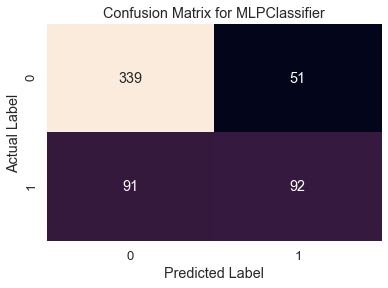

In [187]:
models_names={ann:'MLPClassifier'}

print('Accuracy for {} model is'.format(models_names[ann]),'\n',accuracy_score(y_test,y_test_predict_ann))
print('\n')
print('Classification report for {} model is'.format(models_names[ann]),'\n',classification_report(y_test,y_test_predict_ann))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[ann]))
sns.heatmap(confusion_matrix(y_test,y_test_predict_ann),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[ann]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

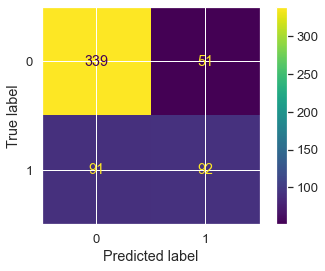

In [188]:
plot_confusion_matrix(best_grid_ann,X_test,y_test)

In [189]:
best_grid_ann.score(X_test,y_test)

0.7521815008726004

### AUC and ROC for the test data

AUC: 0.781


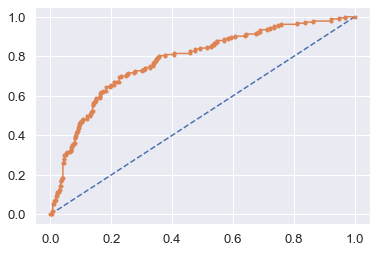

In [190]:
# predict probabilities
probs = best_grid_ann.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [191]:
# **************************************************************************************************